In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Create an output directory to save results
output_dir = r"C:\Users\M. Faizan\Desktop\SE\6th\Saved"
os.makedirs(output_dir, exist_ok=True)

# Load dataset
file_path = r"C:\Users\M. Faizan\Desktop\SE\6th\Saved/cleaned_data_without_outliers.csv"
df = pd.read_csv(file_path)

Columns in dataset: Index(['datetime', 'subba', 'subba-name', 'parent', 'parent-name',
       'electricity_demand', 'value-units', 'temperature_2m', 'hour', 'day',
       'month', 'year', 'day_of_week', 'is_weekend', 'season'],
      dtype='object')
Regression Model Metrics:
MSE: 0.0320
RMSE: 0.1788
R2 Score: 0.0026


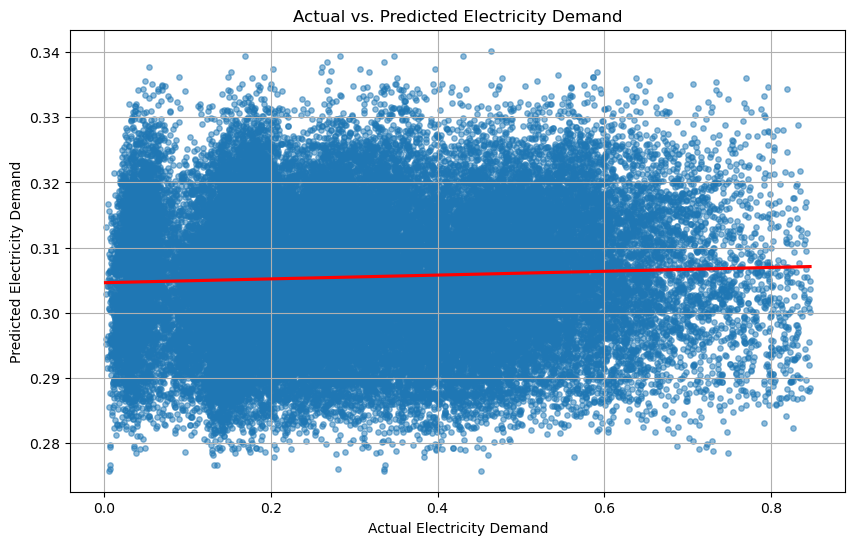

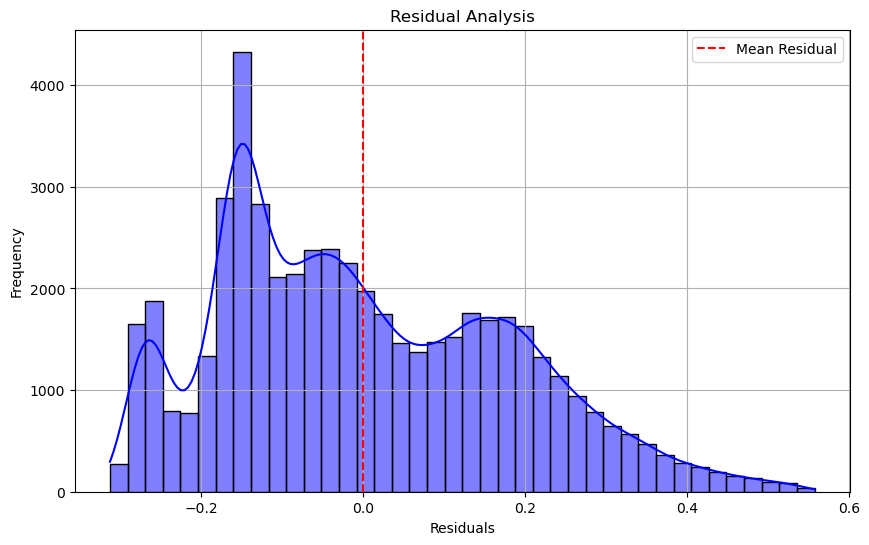

Regression modeling completed. Results saved in: C:\Users\M. Faizan\Desktop\SE\6th\Saved


In [5]:
# Print column names for debugging
print("Columns in dataset:", df.columns)

# Ensure "datetime" is in datetime format
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

# ====================================
# 2. Feature Selection & Data Cleaning
# ====================================

# Select relevant features and target variable
features = ["hour", "day", "month", "day_of_week", "temperature_2m"]
target = "electricity_demand"

# Drop rows with missing values in selected features
df = df.dropna(subset=features + [target])

# =========================
# 3. Train-Test Split
# =========================

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# 4. Regression Modeling
# =========================

# Build & Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# =========================
# 5. Model Evaluation
# =========================

# Calculate Performance Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Save Model Evaluation Metrics
with open(os.path.join(output_dir, "regression_metrics.txt"), "w") as f:
    f.write(f"Mean Squared Error (MSE): {mse:.4f}\n")
    f.write(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")
    f.write(f"R2 Score: {r2:.4f}\n")

print("Regression Model Metrics:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# =========================
# 6. Visualization
# =========================

#  Scatter Plot: Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"s": 15, "alpha": 0.5}, line_kws={"color": "red"}, marker='o')
plt.xlabel("Actual Electricity Demand")
plt.ylabel("Predicted Electricity Demand")
plt.title("Actual vs. Predicted Electricity Demand")
plt.grid(True)
plt.savefig(os.path.join(output_dir, "actual_vs_predicted.png"), dpi=300)
plt.show()

#  Residual Analysis: Histogram
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=40, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--", label="Mean Residual")
plt.title("Residual Analysis")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, "residual_analysis.png"), dpi=300)
plt.show()

print("Regression modeling completed. Results saved in:", output_dir)